In [1]:
from google.colab import files
uploaded = files.upload()


Saving api_data_aadhar_demographic_0_500000.csv to api_data_aadhar_demographic_0_500000.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("api_data_aadhar_demographic_0_500000.csv")
df

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,1/3/2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,1/3/2025,Andhra Pradesh,Chittoor,517132,22,375
2,1/3/2025,Gujarat,Rajkot,360006,65,765
3,1/3/2025,Andhra Pradesh,Srikakulam,532484,24,314
4,1/3/2025,Rajasthan,Udaipur,313801,45,785
...,...,...,...,...,...,...
499995,19-09-2025,Maharashtra,Satara,415212,0,1
499996,19-09-2025,Maharashtra,Satara,415312,0,5
499997,19-09-2025,Maharashtra,Satara,415510,0,3
499998,19-09-2025,Maharashtra,Satara,415511,0,10


In [4]:
df.shape

(500000, 6)

In [5]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,1/3/2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,1/3/2025,Andhra Pradesh,Chittoor,517132,22,375
2,1/3/2025,Gujarat,Rajkot,360006,65,765
3,1/3/2025,Andhra Pradesh,Srikakulam,532484,24,314
4,1/3/2025,Rajasthan,Udaipur,313801,45,785


In [6]:
df.tail()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
499995,19-09-2025,Maharashtra,Satara,415212,0,1
499996,19-09-2025,Maharashtra,Satara,415312,0,5
499997,19-09-2025,Maharashtra,Satara,415510,0,3
499998,19-09-2025,Maharashtra,Satara,415511,0,10
499999,19-09-2025,Maharashtra,Satara,415516,0,3


In [7]:
df.info

<bound method DataFrame.info of               date           state    district  pincode  demo_age_5_17  \
0         1/3/2025   Uttar Pradesh   Gorakhpur   273213             49   
1         1/3/2025  Andhra Pradesh    Chittoor   517132             22   
2         1/3/2025         Gujarat      Rajkot   360006             65   
3         1/3/2025  Andhra Pradesh  Srikakulam   532484             24   
4         1/3/2025       Rajasthan     Udaipur   313801             45   
...            ...             ...         ...      ...            ...   
499995  19-09-2025     Maharashtra      Satara   415212              0   
499996  19-09-2025     Maharashtra      Satara   415312              0   
499997  19-09-2025     Maharashtra      Satara   415510              0   
499998  19-09-2025     Maharashtra      Satara   415511              0   
499999  19-09-2025     Maharashtra      Satara   415516              0   

        demo_age_17_  
0                529  
1                375  
2                765  
3                314  
4                785  
...              ...  
499995             1  
499996             5  
499997             3  
499998            10  
499999             3  

[500000 rows x 6 columns]>

In [8]:
df.isnull().sum()


,0
date,0
state,0
district,0
pincode,0
demo_age_5_17,0
demo_age_17_,0


In [9]:
# Percentage of missing values
(df.isnull().sum() / len(df)) * 100


,0
date,0.0
state,0.0
district,0.0
pincode,0.0
demo_age_5_17,0.0
demo_age_17_,0.0


In [10]:
df.describe()

,pincode,demo_age_5_17,demo_age_17_
count,500000.000000,500000.000000,500000.000000
mean,529213.514372,2.875866,25.714186
std,197602.642764,19.741769,158.938263
min,110001.000000,0.000000,0.000000
25%,400019.000000,0.000000,2.000000
50%,531031.000000,1.000000,6.000000
75%,700083.000000,2.000000,16.000000
max,855456.000000,2690.000000,15090.000000


In [11]:
if 'Gender' in df.columns:
    df['Gender'].value_counts().plot(kind='bar')
    plt.title("Gender-wise Aadhaar Enrolment")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()


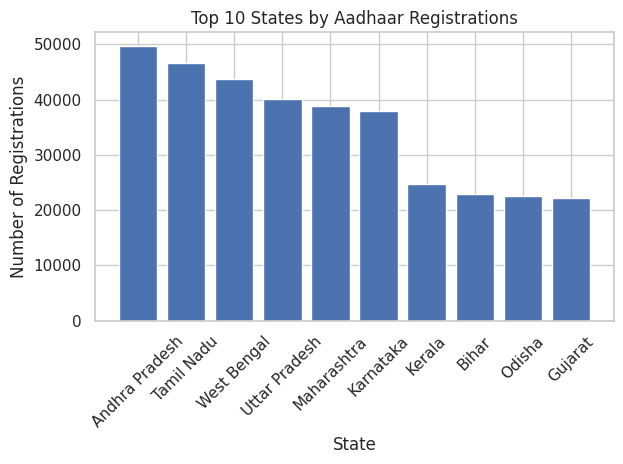

In [13]:
top_states = df['state'].value_counts().head(10)

plt.bar(top_states.index, top_states.values)
plt.title("Top 10 States by Aadhaar Registrations")
plt.xlabel("State")
plt.ylabel("Number of Registrations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


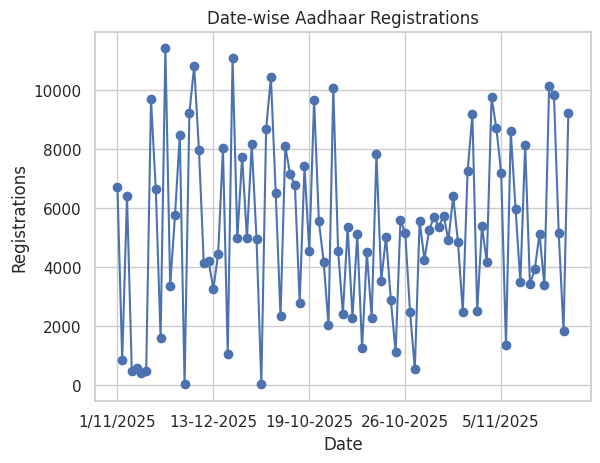

In [ ]:
if 'date' in df.columns:
    df.groupby('date').size().plot(marker='o')
    plt.title("Date-wise Aadhaar Registrations")
    plt.xlabel("Date")
    plt.ylabel("Registrations")
    plt.show()


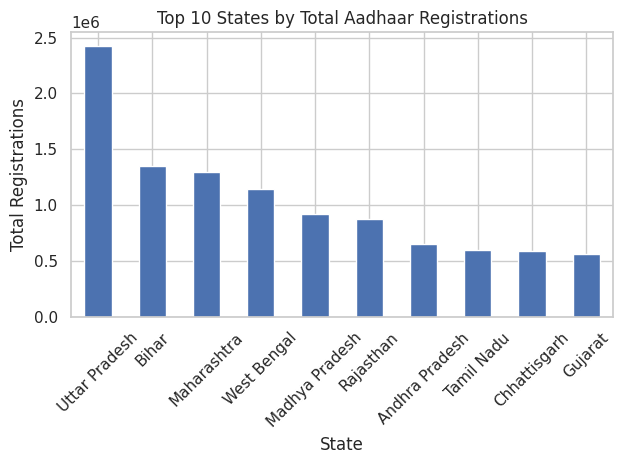

In [23]:
df['total_registrations'] = df['demo_age_5_17'] + df['demo_age_17_']

top_states = df.groupby('state')['total_registrations'].sum().sort_values(ascending=False).head(10)

top_states.plot(kind='bar')
plt.title("Top 10 States by Total Aadhaar Registrations")
plt.xlabel("State")
plt.ylabel("Total Registrations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


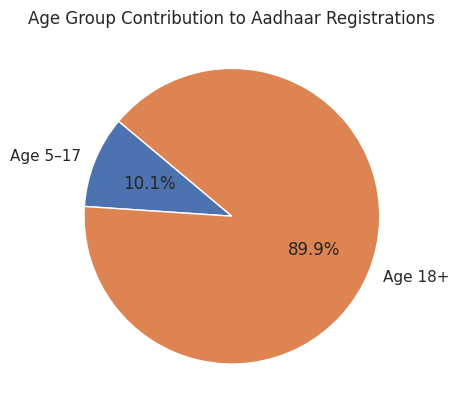

In [24]:
age_totals = [
    df['demo_age_5_17'].sum(),
    df['demo_age_17_'].sum()
]

plt.pie(
    age_totals,
    labels=['Age 5–17', 'Age 18+'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Age Group Contribution to Aadhaar Registrations")
plt.show()


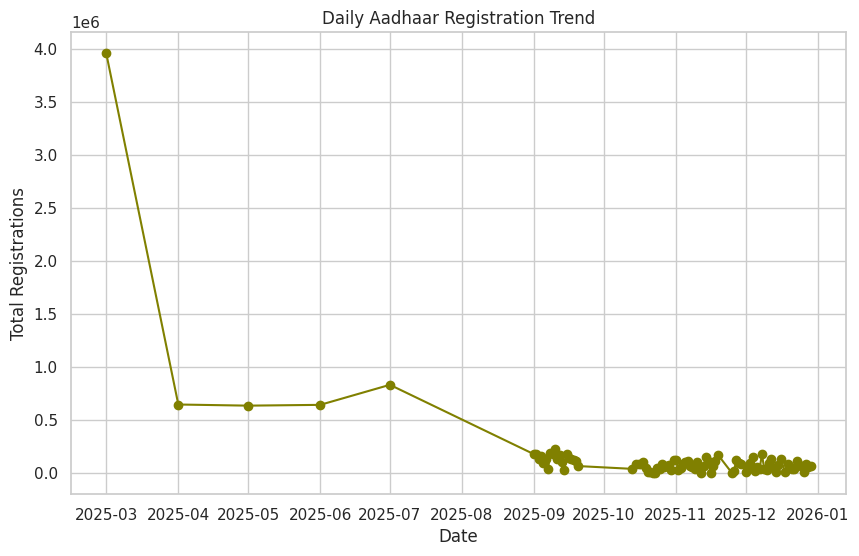

In [30]:
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)

daily_trend = df.groupby('date')['total_registrations'].sum()

plt.figure(figsize=(10,6))
plt.plot(daily_trend.index, daily_trend.values, marker='o',color='olive')
plt.title("Daily Aadhaar Registration Trend")
plt.xlabel("Date")
plt.ylabel("Total Registrations")
plt.grid(True)
plt.show()

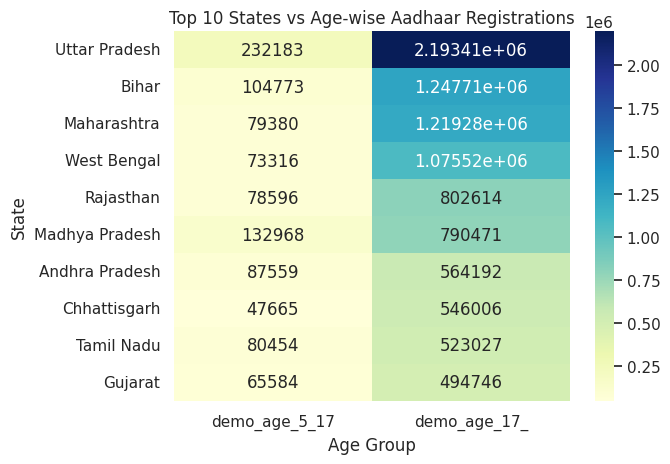

In [32]:
state_age = df.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum()
top10_states = state_age.sort_values(by='demo_age_17_', ascending=False).head(10)

sns.heatmap(top10_states, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Top 10 States vs Age-wise Aadhaar Registrations")
plt.xlabel("Age Group")
plt.ylabel("State")
plt.show()


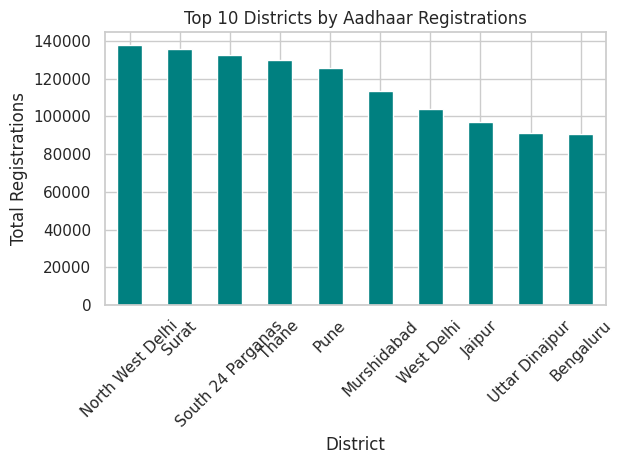

In [35]:
top_districts = df.groupby('district')['total_registrations'].sum().sort_values(ascending=False).head(10)

top_districts.plot(kind='bar', color='teal')
plt.title("Top 10 Districts by Aadhaar Registrations")
plt.xlabel("District")
plt.ylabel("Total Registrations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
